# 5.2 Data Analysis

## Importing required packages

In [34]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import requests as req
from bs4 import BeautifulSoup as bs
import html5lib as h5l
import urllib3 as ul3
from ipyleaflet import Map, GeoJSON
import time
import json
from  geopy.geocoders import Nominatim
import warnings
warnings.filterwarnings('ignore')

## About Dataset

- The dataset contains information about accidents all over India from 2001 to 2014 distributed across various locations (states) and over different time (month).

In [35]:
df=pd.read_csv('Accident_Month.csv')
df

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
0,A & N Islands,2001,8,23,15,15,14,19,14,19,7,12,13,22,181
1,A & N Islands,2002,12,10,14,16,10,7,16,11,23,21,11,17,168
2,A & N Islands,2003,19,13,15,13,13,12,8,16,17,25,14,15,180
3,A & N Islands,2004,21,14,22,17,13,18,16,19,16,20,15,24,215
4,A & N Islands,2005,19,21,22,17,13,19,21,14,15,19,10,16,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,West Bengal,2010,1245,1150,1349,1246,1172,1284,1231,1190,1128,1227,1251,1252,14725
486,West Bengal,2011,1350,1179,1314,1148,1220,1241,1185,1074,1112,1214,1161,1270,14468
487,West Bengal,2012,1346,1383,1357,1270,1352,1434,1349,1204,1112,1251,1179,1371,15608
488,West Bengal,2013,1564,1382,1474,1392,1629,1391,1315,1208,1228,1299,1335,1332,16549


In [3]:
for i in range(1,15):
    df.iloc[:,[i]]=df.iloc[:,[i]].astype(int)
df.iloc[139,df.columns.get_loc('STATE/UT')]='Delhi (Ut)'
df.iloc[111,df.columns.get_loc('STATE/UT')]='D & N Haveli'

## Data Description

In [4]:
print("Shape of data :",df.shape)
print()
print("Fields :",*list(df.columns),sep=" ")
print()
print("Missing Values :")
print()
print(df.isnull().sum())
df.describe().T

Shape of data : (490, 15)

Fields : STATE/UT YEAR JANUARY FEBRUARY MARCH APRIL MAY JUNE JULY AUGUST SEPTEMBER OCTOBER NOVEMBER DECEMBER TOTAL

Missing Values :

STATE/UT     0
YEAR         0
JANUARY      0
FEBRUARY     0
MARCH        0
APRIL        0
MAY          0
JUNE         0
JULY         0
AUGUST       0
SEPTEMBER    0
OCTOBER      0
NOVEMBER     0
DECEMBER     0
TOTAL        0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
YEAR,490.0,2007.500000,4.035249,2001.0,2004.00,2007.5,2011.00,2014.0
JANUARY,490.0,985.140816,1403.961467,0.0,31.00,329.5,1513.50,9062.0
FEBRUARY,490.0,937.289796,1326.928970,0.0,30.00,348.5,1394.25,8705.0
MARCH,490.0,992.124490,1403.445117,0.0,32.25,369.0,1381.00,9205.0
APRIL,490.0,978.904082,1397.371515,0.0,25.25,350.0,1356.25,9006.0
MAY,490.0,1064.414286,1508.166230,0.0,32.25,387.5,1464.00,9330.0
JUNE,490.0,966.477551,1345.067531,0.0,28.00,342.5,1384.00,5915.0
JULY,490.0,898.495918,1245.805847,0.0,28.25,308.0,1301.50,5719.0
AUGUST,490.0,894.593878,1263.668002,0.0,28.50,313.0,1222.25,5936.0
SEPTEMBER,490.0,888.371429,1250.579984,0.0,27.75,311.5,1227.50,5777.0


##  Month wise analysis of accidents in each state

In [5]:
months=list(df[0:0].iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13]])
print('Months: ',*months)
print()
states=list(df['STATE/UT'].unique())
print('States: ',*states)

Months:  JANUARY FEBRUARY MARCH APRIL MAY JUNE JULY AUGUST SEPTEMBER OCTOBER NOVEMBER DECEMBER

States:  A & N Islands Andhra Pradesh Arunachal Pradesh Assam Bihar Chandigarh Chhattisgarh D & N Haveli Daman & Diu Delhi (Ut) Goa Gujarat Haryana Himachal Pradesh Jammu & Kashmir Jharkhand Karnataka Kerala Lakshadweep Madhya Pradesh Maharashtra Manipur Meghalaya Mizoram Nagaland Odisha Puducherry Punjab Rajasthan Sikkim Tamil Nadu Tripura Uttar Pradesh Uttarakhand West Bengal


In [6]:
ms=pd.DataFrame(index=states,columns=months)
ms=ms.fillna(0)
c=0
for i in range(1,491):
    for j in months:
        ms.iloc[c,ms.columns.get_loc(j)]+=df.loc[i-1][j]
    if i%14==0:
        c+=1
ms

,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
A & N Islands,264,246,248,256,211,238,217,234,238,267,205,269
Andhra Pradesh,46452,44657,47732,46893,51442,46570,42374,43947,41520,43697,44013,47524
Arunachal Pradesh,306,298,295,253,298,263,238,247,284,290,301,316
Assam,5318,5207,5623,5224,5122,4961,4845,4890,4837,5319,5226,5146
Bihar,7075,7618,8538,7760,9984,9305,7487,6714,6335,6929,7602,7301
Chandigarh,521,498,549,525,547,484,491,532,573,589,544,558
Chhattisgarh,10826,10040,10157,10337,10992,9847,9269,8621,8867,9831,9356,9674
D & N Haveli,123,122,120,96,112,110,92,97,98,114,90,129
Daman & Diu,72,48,54,62,47,48,56,40,41,48,64,63
Delhi (Ut),9282,9355,10289,9470,9806,9438,9982,10295,10007,10609,10315,10426


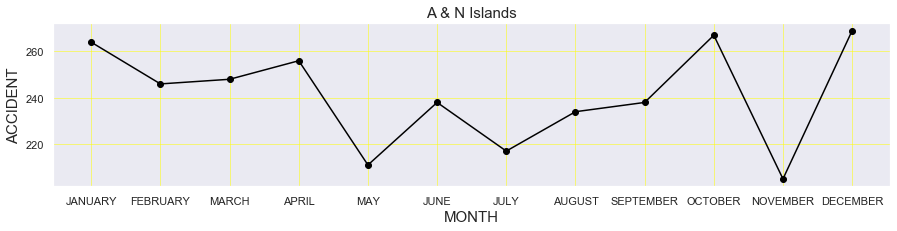

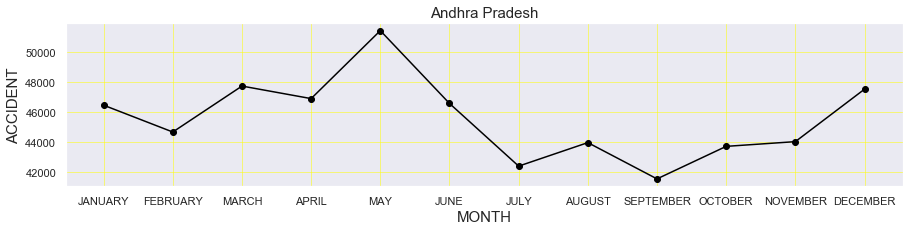

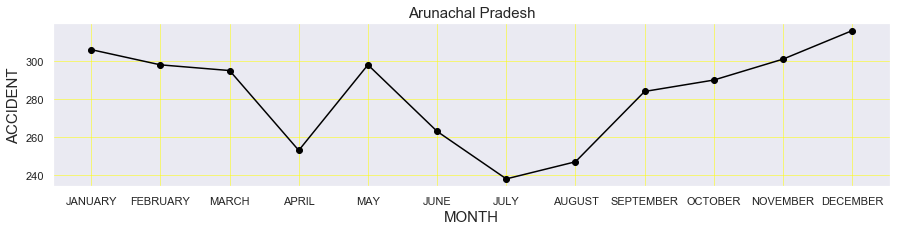

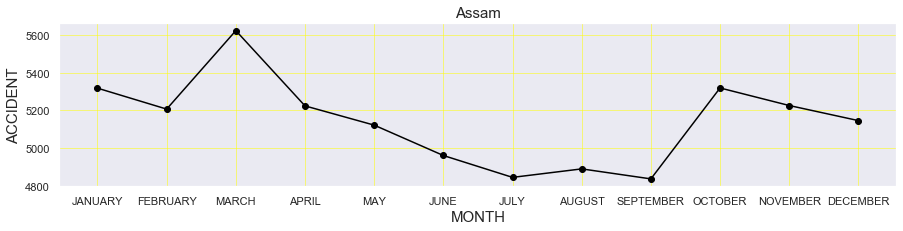

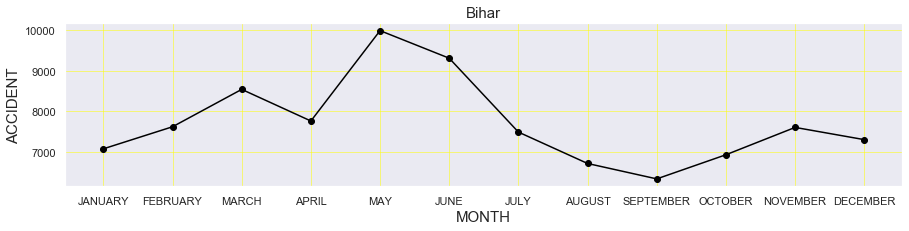

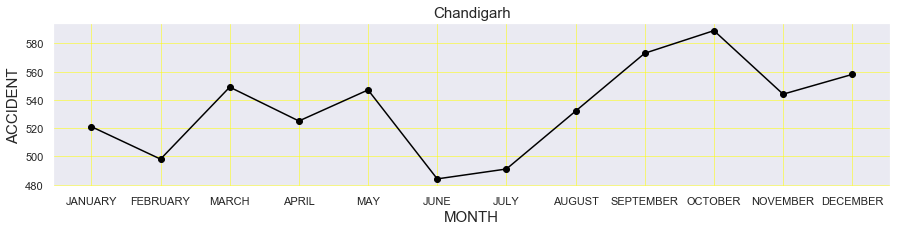

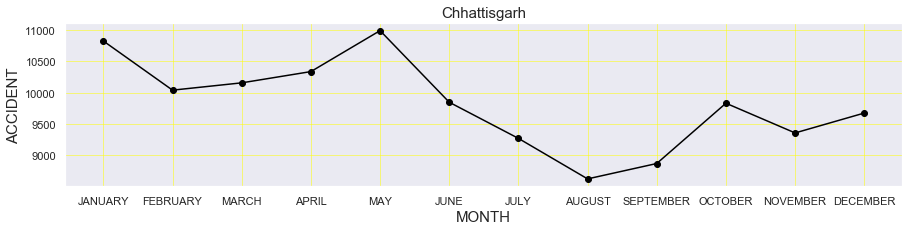

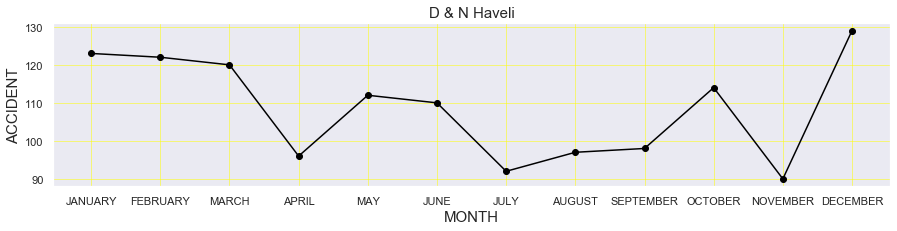

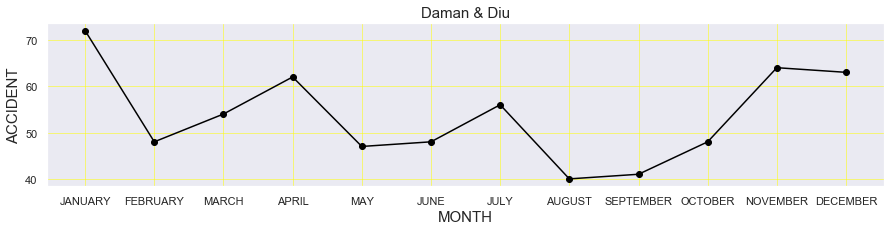

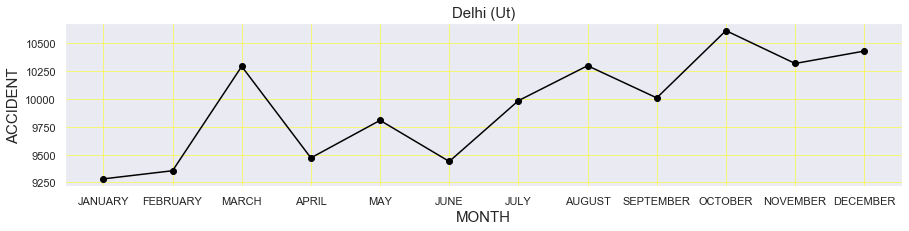

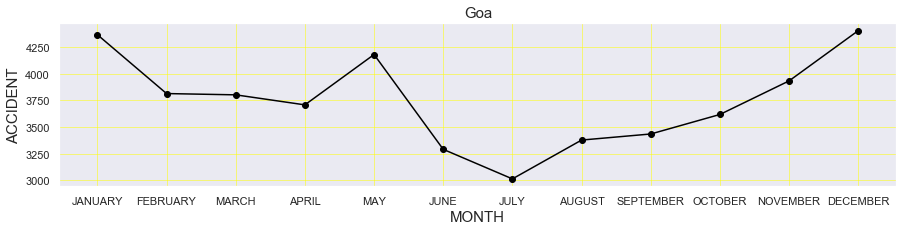

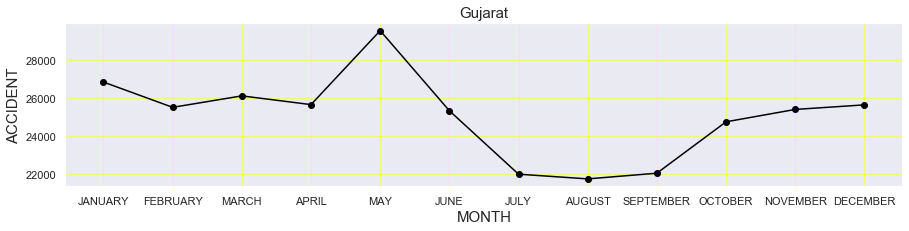

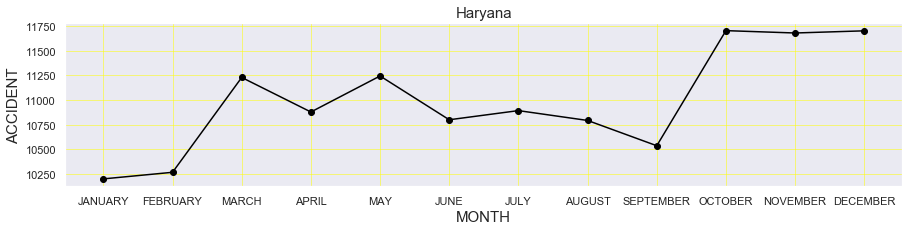

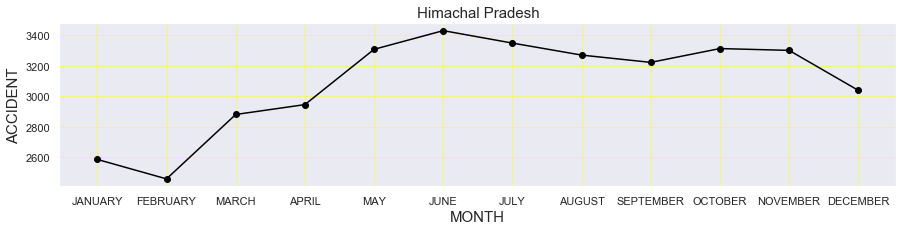

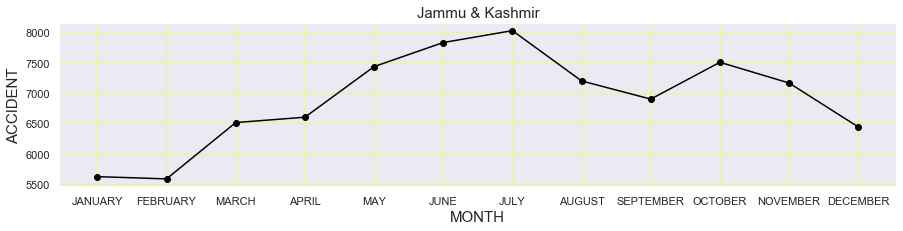

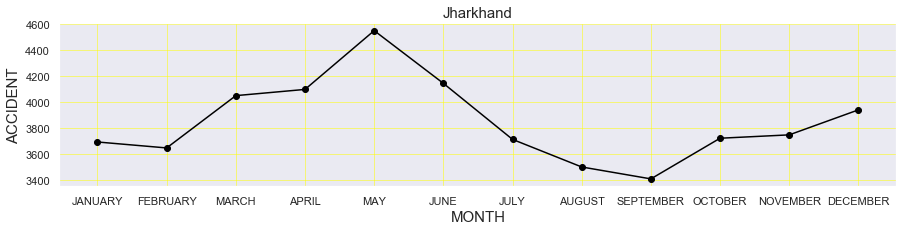

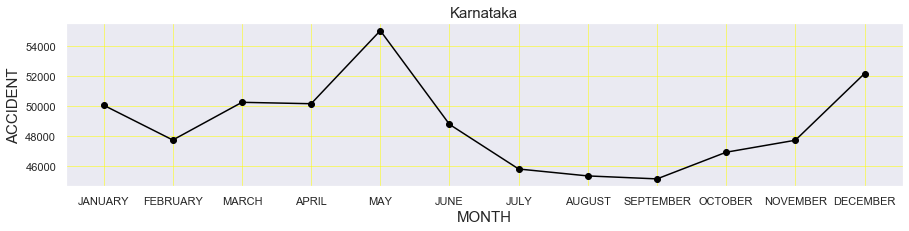

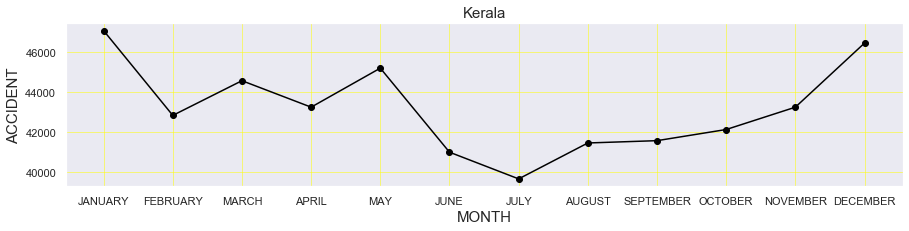

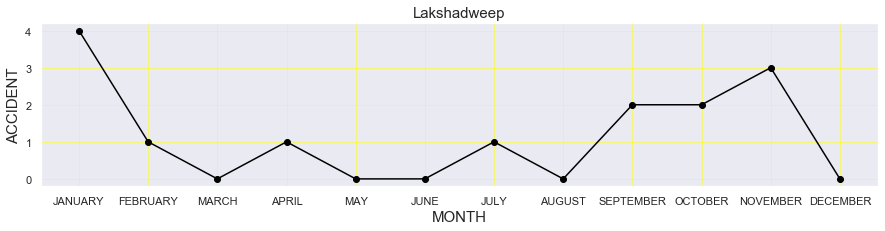

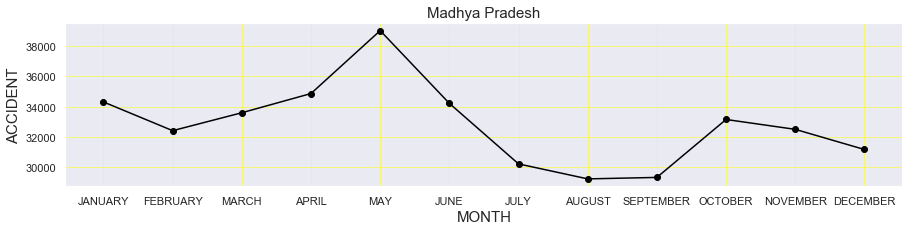

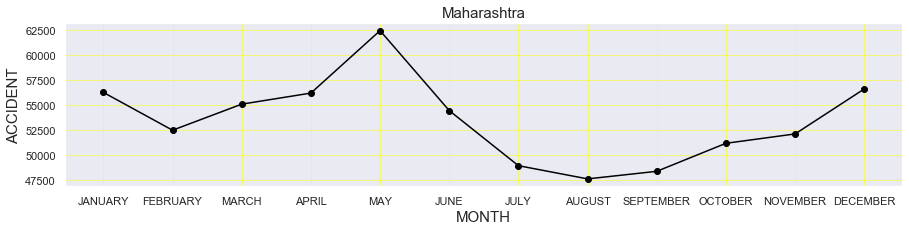

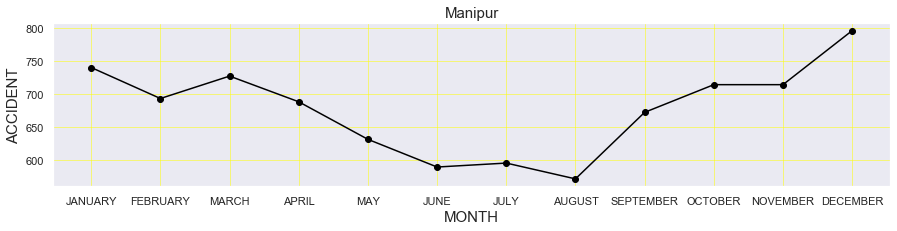

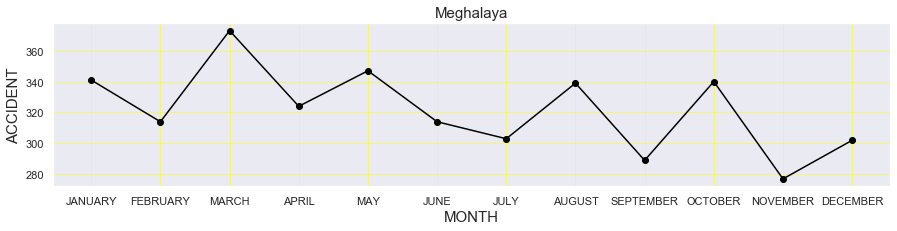

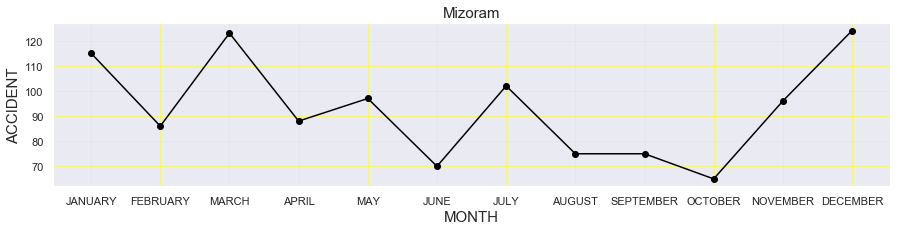

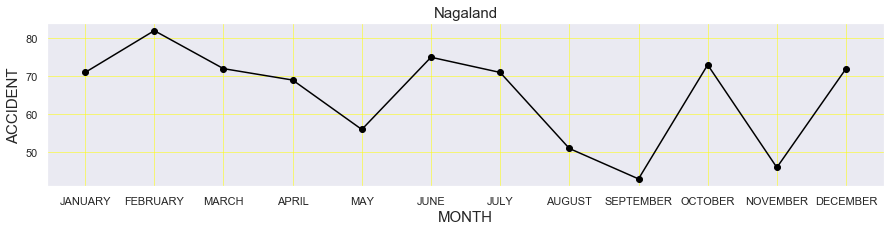

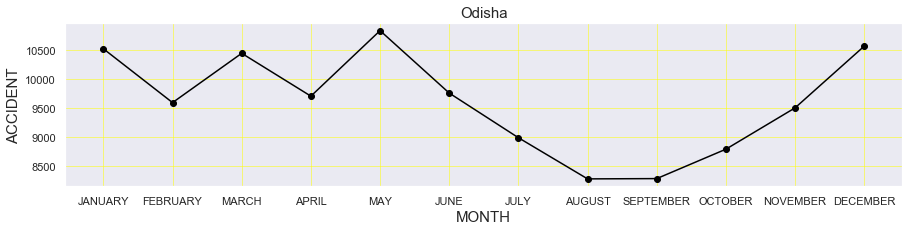

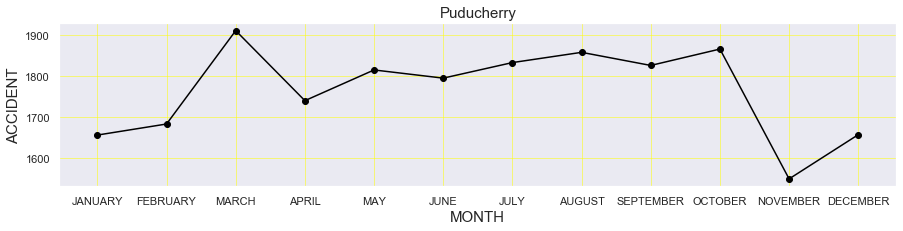

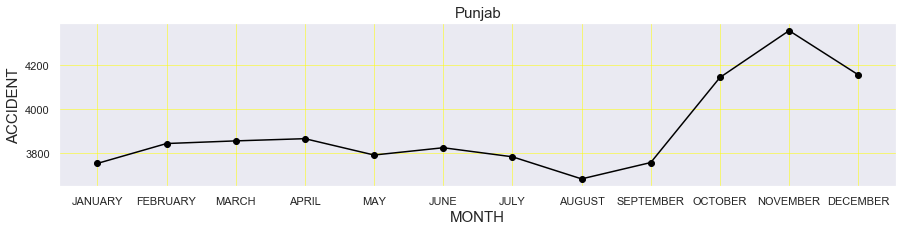

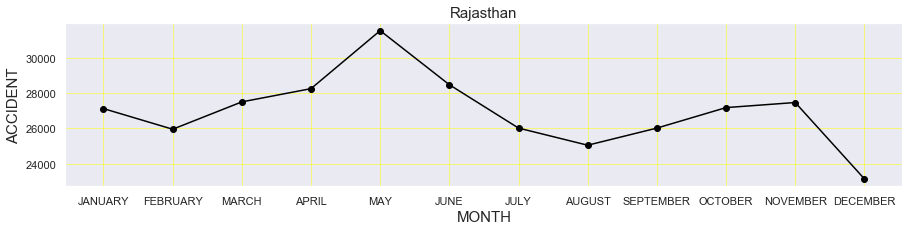

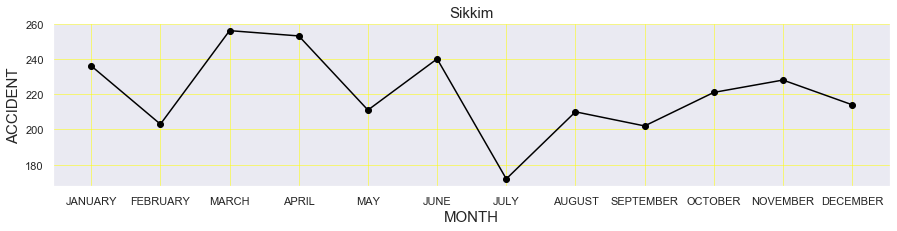

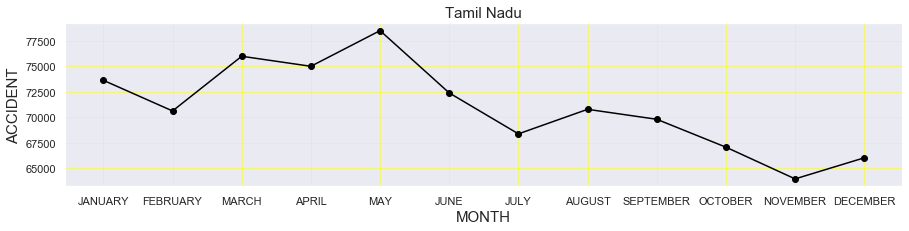

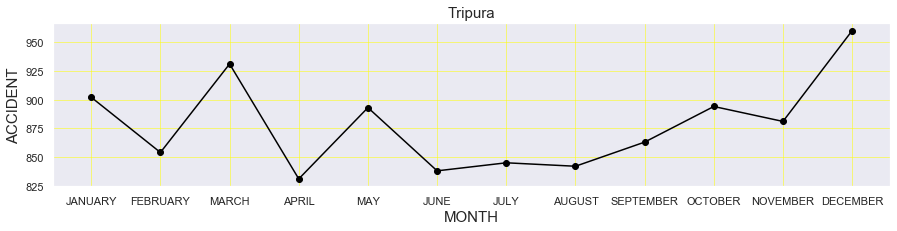

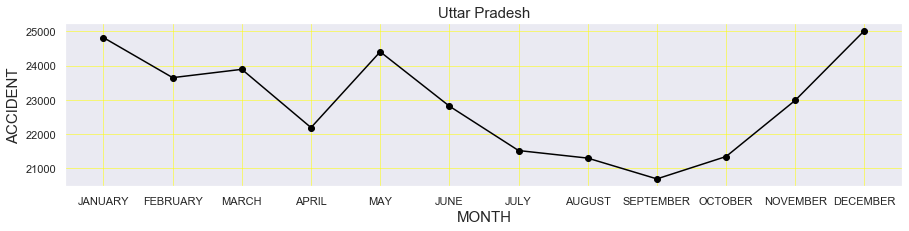

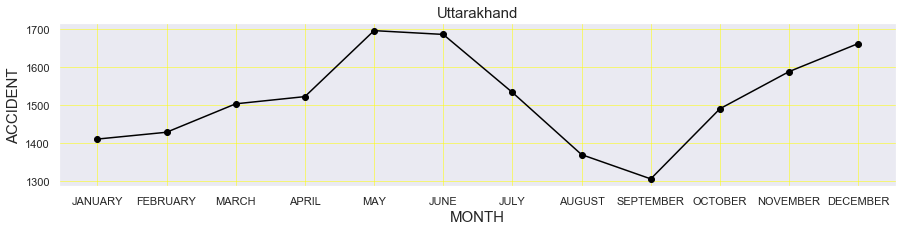

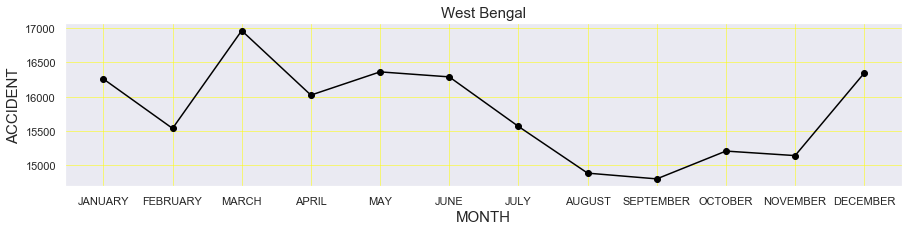

In [36]:
l=list(range(1,13))
for i in range(35):
    plt.figure(figsize=(15,3))
    plt.grid(linestyle='-',color='yellow',linewidth='0.5')
    plt.plot(l,list(ms.loc[states[i]]),marker='o',color='black')
    plt.xticks(l, months)
    plt.xlabel('MONTH',fontsize=15)
    plt.ylabel('ACCIDENT',fontsize=15)
    plt.title(states[i],fontsize=15)
    plt.show()
    print()

## Season wise analysis of Accidents

In [8]:
summer=ms.iloc[:,[2,3,4]]
summer.head()

,MARCH,APRIL,MAY
A & N Islands,248,256,211
Andhra Pradesh,47732,46893,51442
Arunachal Pradesh,295,253,298
Assam,5623,5224,5122
Bihar,8538,7760,9984


In [9]:
winter=ms.iloc[:,[11,0,1]]
winter.head()

,DECEMBER,JANUARY,FEBRUARY
A & N Islands,269,264,246
Andhra Pradesh,47524,46452,44657
Arunachal Pradesh,316,306,298
Assam,5146,5318,5207
Bihar,7301,7075,7618


In [10]:
rainy=ms.iloc[:,[5,6,7]]
rainy.head()

,JUNE,JULY,AUGUST
A & N Islands,238,217,234
Andhra Pradesh,46570,42374,43947
Arunachal Pradesh,263,238,247
Assam,4961,4845,4890
Bihar,9305,7487,6714


In [11]:
autumn=ms.iloc[:,[8,9,10]]
autumn.head()

,SEPTEMBER,OCTOBER,NOVEMBER
A & N Islands,238,267,205
Andhra Pradesh,41520,43697,44013
Arunachal Pradesh,284,290,301
Assam,4837,5319,5226
Bihar,6335,6929,7602


In [12]:
tot_summer=sum([summer[i].sum() for i in summer[0:0]])
tot_winter=sum([winter[i].sum() for i in winter[0:0]])
tot_rainy=sum([rainy[i].sum() for i in rainy[0:0]])
tot_autumn=sum([autumn[i].sum() for i in autumn[0:0]])
tot_acc=tot_summer+tot_winter+tot_rainy+tot_autumn
print(tot_summer,tot_rainy,tot_autumn,tot_winter,tot_acc)

1487367 1352188 1347455 1415896 5602906


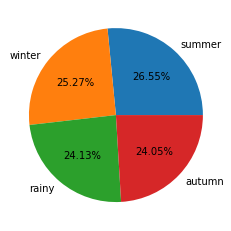

In [13]:
plt.pie([tot_summer,tot_winter,tot_rainy,tot_autumn],
            labels=['summer','winter','rainy','autumn'],autopct='%1.2f%%')
plt.show()

- the above observation shows that maximum number of accidents occurs in summer season

## Updating the existing data set by adding new data

- The data set consists of state wise accidents list from 2013 to 2016 from which we are going to extract 2015 and 2016 data and append it to our dataset.

In [14]:
d2=pd.read_csv('2015-16.csv')
d2.head()

,SI. No.,States/UTs,State/UT-Wise Total Number of Road Accidents during - 2013,State/UT-Wise Total Number of Road Accidents during - 2014,State/UT-Wise Total Number of Road Accidents during - 2015,State/UT-Wise Total Number of Road Accidents during - 2016,Share of States/UTs in Total Number of Road Accidents - 2013,Share of States/UTs in Total Number of Road Accidents - 2014,Share of States/UTs in Total Number of Road Accidents - 2015,Share of States/UTs in Total Number of Road Accidents - 2016,Total Number of Accidents Per Lakh Population - 2013,Total Number of Accidents Per Lakh Population - 2014,Total Number of Accidents Per Lakh Population - 2015,Total Number of Accidents Per Lakh Population - 2016,"Total Number of Road Accidents per 10,000 Vehicles - 2013","Total Number of Road Accidents per 10,000 Vehicles - 2014","Total Number of Road Accidents per 10,000 Vehicles - 2015","Total Number of Road Accidents per 10,000 Km of Roads - 2013","Total Number of Road Accidents per 10,000 Km of Roads - 2014","Total Number of Road Accidents per 10,000 Km of Roads - 2015"
0,1,Andhra Pradesh,43482.0,24440,24258,24888,8.9,5.0,4.8,5.2,50.4,28.1,27.7,28.2,34.3,34.9,30.8,1661.8,1372.3,1355.0
1,2,Arunachal Pradesh,308.0,205,284,249,0.1,0.0,0.1,0.1,24.3,16.0,21.9,19.0,20.4,13.6,18.8,109.6,83.8,112.0
2,3,Assam,7211.0,7144,6959,7435,1.5,1.5,1.4,1.5,23.0,22.5,21.7,22.9,38.4,32.2,27.7,250.3,227.8,213.1
3,4,Bihar,10200.0,9556,9555,8222,2.1,2.0,1.9,1.7,10.2,9.4,9.3,7.9,28.2,23.0,20.0,517.1,455.6,463.8
4,5,Chhattisgarh,13657.0,13821,14446,13580,2.8,2.8,2.9,2.8,54.8,54.8,56.5,52.5,39.7,35.7,33.5,1530.4,1461.3,1481.1


In [15]:
dt=d2.iloc[:,[1,4,5]]
dt=dt.rename(columns={'State/UT-Wise Total Number of Road Accidents during - 2015': '2015',
                      'State/UT-Wise Total Number of Road Accidents during - 2016': '2016'})
dt=dt.sort_values(by='States/UTs')
dt.iloc[1,1]+=dt.iloc[31:32,0:3].values[0][1]
dt.iloc[1,2]+=dt.iloc[31:32,0:3].values[0][2]
dt=dt[dt['States/UTs'] != 'Telangana']
dt=dt[dt['States/UTs'] != 'Total']
dt.head()

,States/UTs,2015,2016
29,Andaman & Nicobar Islands,258,238
0,Andhra Pradesh,45510,47699
1,Arunachal Pradesh,284,249
2,Assam,6959,7435
3,Bihar,9555,8222


In [16]:
years=list(range(2001,2017))
print('Years :',*years)

Years : 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016


In [17]:
hf=pd.DataFrame(index=states,columns=years)
hf=hf.fillna(0)
x=0
for i in range(0,490,14):
    y=0
    for i in df.iloc[i:i+14,[14]].values:
        hf.iloc[x,y]=i[0]
        y+=1
    x+=1
hf.iloc[0:35,[14]]=dt.iloc[0:35,[1]].values
hf.iloc[0:35,[15]]=dt.iloc[0:35,[2]].values
hf

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
A & N Islands,181,168,180,215,206,155,152,191,271,285,235,236,200,218,258,238
Andhra Pradesh,27188,32577,34537,37078,37289,41323,43594,42106,42011,42428,41066,39344,43048,43232,45510,47699
Arunachal Pradesh,236,235,229,217,237,243,230,261,261,280,263,204,308,185,284,249
Assam,1806,2243,2145,2002,3656,4080,3995,4262,4585,5485,6569,6535,7211,7144,6959,7435
Bihar,4334,4372,3902,3890,3746,4382,5631,6180,8366,8441,9355,10320,10198,9531,9555,8222
Chandigarh,493,494,443,411,528,521,536,477,424,456,441,412,409,366,416,428
Chhattisgarh,4987,5801,7023,6075,5996,7111,7837,8769,7913,7802,9195,13511,13657,12140,14446,13580
D & N Haveli,87,80,73,111,127,103,116,116,45,79,103,85,91,87,69,70
Daman & Diu,35,68,72,47,57,57,60,50,21,36,21,50,30,39,70,71
Delhi (Ut),9282,8710,8869,9110,9580,9699,10528,8566,7614,7220,7280,6937,7569,8310,8085,7375


## Year wise Accident Analysis

In [18]:
accidents_year=[]
for i in years:
    accidents_year.append(hf[i].values.sum())
print('Year wise total Accidents :',*accidents_year)

Year wise total Accidents : 323720 335707 336468 361343 390378 394432 418657 415855 421628 430654 440123 440042 443001 450898 501423 480652


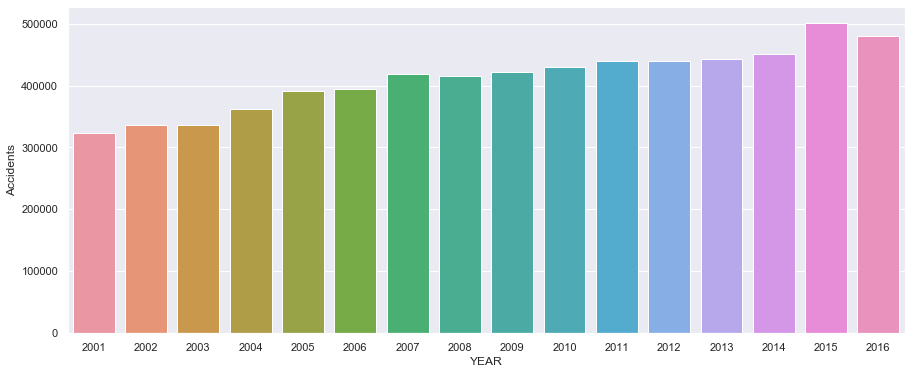

In [19]:
sns.set(rc={'figure.figsize':(15,6)})
year_analysis=sns.barplot(years,accidents_year)
year_analysis.set(xlabel='YEAR',ylabel='Accidents')
plt.show()

- 2015 and 2016 marks the highest in number of accidents with count up to 500000+ and 450000+ respectively
- 2001 and 2002 marks the lowest number of accidents
- After 2015 and 2016, 2014 marks the top in ost number of accidents

## State wise analysis of Accidents

In [20]:
accidents_sum=[]
for i in range(35):
    accidents_sum.append(sum(hf[i:i+1].values[0]))
print('Total Accidents state wise :',*accidents_sum)

Total Accidents state wise : 3389 640030 3922 76112 110425 7255 145843 1442 784 134734 53573 345367 154329 43283 94157 56303 673175 596595 18 502926 745297 9339 5089 1269 910 136311 24485 60458 370791 3075 992563 11738 342525 21306 216163


In [21]:
states=list(df['STATE/UT'].unique())
print('States :',*states)

States : A & N Islands Andhra Pradesh Arunachal Pradesh Assam Bihar Chandigarh Chhattisgarh D & N Haveli Daman & Diu Delhi (Ut) Goa Gujarat Haryana Himachal Pradesh Jammu & Kashmir Jharkhand Karnataka Kerala Lakshadweep Madhya Pradesh Maharashtra Manipur Meghalaya Mizoram Nagaland Odisha Puducherry Punjab Rajasthan Sikkim Tamil Nadu Tripura Uttar Pradesh Uttarakhand West Bengal


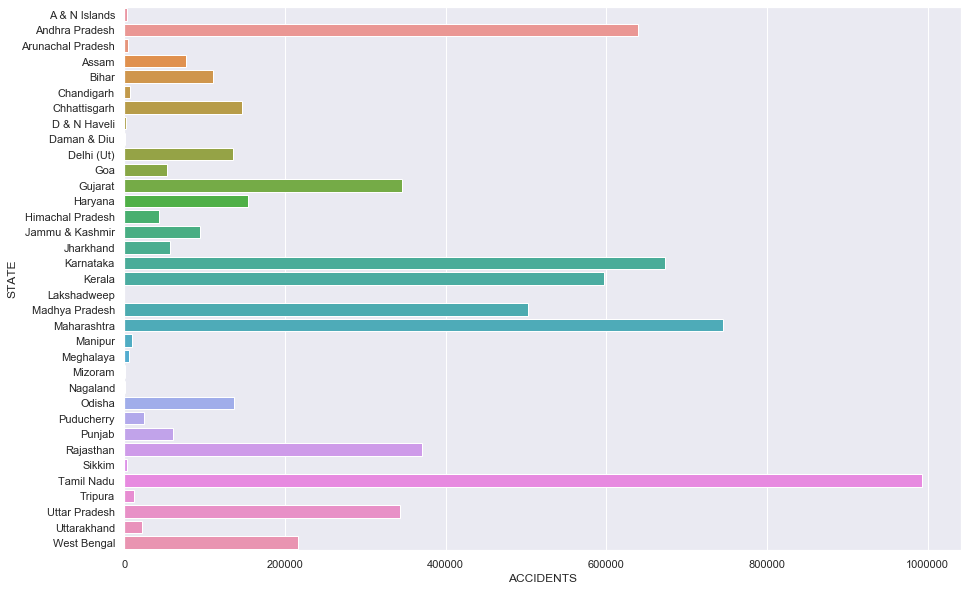

In [22]:
sns.set(rc={'figure.figsize':(15,10)})
state_analysis=sns.barplot(x=accidents_sum,y=states)
state_analysis.set(xlabel='ACCIDENTS',ylabel='STATE')
plt.show()

- Tamil Nadu has been recorded as the most accident-prone state in India with accidents over 900000+
- Lakshadweep, Mizoram, and Nagaland are the states having a minimum number of accidents
- Other than Tamil Nadu, Maharashtra, Karnataka, and Andhra Pradesh are also the most accident-prone states in India

## Visualizing the accident prone states in India

In [23]:
url = 'https://raw.githubusercontent.com/geohacker/india/master/state/india_state.geojson'
r = req.get(url)
with open('india_state.goejson', 'w') as f:
    f.write(r.content.decode("utf-8"))
with open('india_state.goejson', 'r') as f:
  data = json.load(f)

In [24]:
dc=dict()
for i in range(35):
    dc[data['features'][i]['properties']['NAME_1']]=accidents_sum[i]/1000000
dc

{'Andaman and Nicobar': 0.003389,
 'Andhra Pradesh': 0.64003,
 'Arunachal Pradesh': 0.003922,
 'Assam': 0.076112,
 'Bihar': 0.110425,
 'Chandigarh': 0.007255,
 'Chhattisgarh': 0.145843,
 'Dadra and Nagar Haveli': 0.001442,
 'Daman and Diu': 0.000784,
 'Delhi': 0.134734,
 'Goa': 0.053573,
 'Gujarat': 0.345367,
 'Haryana': 0.154329,
 'Himachal Pradesh': 0.043283,
 'Jammu and Kashmir': 0.094157,
 'Jharkhand': 0.056303,
 'Karnataka': 0.673175,
 'Kerala': 0.596595,
 'Lakshadweep': 1.8e-05,
 'Madhya Pradesh': 0.502926,
 'Maharashtra': 0.745297,
 'Manipur': 0.009339,
 'Meghalaya': 0.005089,
 'Mizoram': 0.001269,
 'Nagaland': 0.00091,
 'Orissa': 0.136311,
 'Puducherry': 0.024485,
 'Punjab': 0.060458,
 'Rajasthan': 0.370791,
 'Sikkim': 0.003075,
 'Tamil Nadu': 0.992563,
 'Tripura': 0.011738,
 'Uttar Pradesh': 0.342525,
 'Uttaranchal': 0.021306,
 'West Bengal': 0.216163}

In [25]:
m=Map(center=[22.3261918,91.6797798],zoom=5)
m.layout.width = '110%'
m.layout.height = '750px'
for i in range(35):
    geo_json = GeoJSON(data=data['features'][i], 
        style = {'color': 'green', 'opacity':1, 'weight':1.9, 'dashArray':'9', 
             'fillOpacity':dc[data['features'][i]['properties']['NAME_1']]})
    m.add_layer(geo_json)
m

Map(center=[22.3261918, 91.6797798], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

## Data extration of accident prone areas in HYDERABAD

- This data is been extracted from the Hyderabad traffic police website using some of the web scraping tools
- https://www.htp.gov.in/accidentproneareas.html

In [26]:
url='https://www.htp.gov.in/accidentproneareas.html'
ws=req.get(url)
s=bs(ws.content,'html5lib')
tbody=s.find('table').find('tbody').find('tbody').find_all('tr')[27].find('tbody').find('tbody').find('table').find('tbody').find('table').find('tbody').find_all('tr')
frm,to,cop=[],[],[]
for i in tbody:
    s=i.find_all('td')
    frm.append(s[0].text.replace('\n','').replace('\t','')
                   .replace('\xa0','').replace('From','').replace('from',''))
    to.append(s[1].text.replace('\n','').replace('\t','')
                  .replace('\xa0','').replace('From','').replace('from',''))
    cop.append(s[2].text.replace('\n','').replace('\t','')
                   .replace('\xa0','').replace('From','').replace('from',''))
del(frm[8])
del(to[8])
del(frm[23])
del(to[23])
del(frm[34])
del(to[34])
del(frm[49])
del(to[49])
del(frm[54])
del(to[54])
del(frm[64])
del(to[64])
del(frm[76])
del(to[76])
frm[1]='Tajmahal Hotel to Abids Circle'
frm[17]='Zoo Park to City College'
frm[19]='Zoo Park to Puranapool'
frm[21]='Zoo Park to Tadban'
frm[34]='Himayath nagar road  to Himayath nagar Y Junction '
frm[60]='R.P road to Patny X Roads'
frm[72]='Sardar patel road to SBH X Roads'
frm[73]='Sardar patel road to Plaza X Roads'
frm[74]='Sardar patel road to MCH swimming pool bus stop'
frm,to=frm[1:],to[1:]
for i in range(len(frm)):
    if ' to ' in frm[i]:
        frm[i],to[i]=frm[i].split(' to ')
    elif ' to ' in to[i]:
        frm[i],to[i]=to[i].split(' to ')
    elif ' towards ' in frm[i]:
        frm[i],to[i]=frm[i].split(' towards ')
    elif ' towards ' in to[i]:
        frm[i],to[i]=to[i].split(' towards ')
to[29]='gokul theater erragadda'
to[30]='V.V. statue'
to[39]='st. Ann’s school Bollaram'
for i in range(len(frm)):
    frm[i]+=',Hyderabad'
    to[i]+=',Hyderabad'

In [37]:
c=1
for i,j in zip(frm,to):
    print(c,i,j,sep=" ")
    c+=1

1 Tajmahal Hotel,Hyderabad Abids Circle,Hyderabad
2 Alaska,Hyderabad Mangalhat,Hyderabad
3 Amberpet,Hyderabad Ramanthapur,Hyderabad
4 AOC rotary,Hyderabad R.K. Puram X Roads,Hyderabad
5 Ayodhya Junction,Hyderabad pti building ,Hyderabad
6 Ballamrai Junction,Hyderabad Tadbund Junction,Hyderabad
7 Bank street,Hyderabad DM and HS,Hyderabad
8 Bowenpally check post,Hyderabad suchitra Junction.,Hyderabad
9 Bowenpally check post,Hyderabad Suchitra Junction.,Hyderabad
10 Bowenpally,Hyderabad Balanagar ,Hyderabad
11 Bowenpally X Roads,Hyderabad Bowenpally check post,Hyderabad
12 Bowenpally X Roads,Hyderabad Bowenpally check post,Hyderabad
13 Brook bond X Roads,Hyderabad new Monda market, Bowenpally,Hyderabad
14 Chadarghat,Hyderabad Ramkoti ,Hyderabad
15 Chaderghat rotary,Hyderabad S.J. Rotary via Kalikabher.,Hyderabad
16 Chadharghat,Hyderabad M.J. Market ,Hyderabad
17 Zoo Park,Hyderabad City College,Hyderabad
18 City college,Hyderabad Hassan Nagar via PTO, Puranapool, Bahadurpura X Roads,Hydera

In [ ]:
from selenium import webdriver as wd
src=[]
dst=[]
driver=wd.Chrome("C:\\Users\\heman\\Downloads\\chromedriver.exe");
driver.maximize_window()
driver.get('https://www.google.com/maps')
s_bar=driver.find_element_by_name('q')
s_icon=driver.find_element_by_id('searchbox-searchbutton')
for i,j in zip(frm,to):
    s_bar.clear()
    s_bar.send_keys(i)
    s_icon.click()
    time.sleep(7)
    ur=driver.current_url.split('@')[1].split(',')
    x=ur[0]+","+ur[1]
    src.append(x)
    print(x)
    s_bar.clear()
    s_bar.send_keys(j)
    s_icon.click()
    time.sleep(7)
    ur=driver.current_url.split('@')[1].split(',')
    y=ur[0]+","+ur[1]
    dst.append(y)
    print(y)
driver.close()

17.4532846,78.3644935
17.4532846,78.3644935
17.4535876,78.3644933
17.3801054,78.4612723
17.4008475,78.4880372
17.3855329,78.5252663
17.4020368,78.5007076
17.4824231,78.5358272
17.499914,78.3233852
17.4032134,78.4566573
17.4032103,78.4238262
17.4721207,78.4660432
17.3856713,78.4780512
17.3856711,78.4714851
17.4808934,78.4712444
17.4808926,78.4559234
17.4808934,78.4712444
17.4808926,78.4559234
17.4758203,78.4609592
17.4759305,78.4147385
17.4759244,78.4147384
17.4808934,78.4712444
17.4808926,78.4559234
17.4808934,78.4712444
17.4808811,78.4033919
17.433542,78.4940153
17.3755646,78.4917112
17.3903325,78.479763
17.3879797,78.4803824
17.4121531,78.1278402
17.3755646,78.4917112
17.3814135,78.4707386
17.350678,78.4491181
17.3687715,78.4674852
17.3687715,78.4674852
17.3441982,78.430701
17.350678,78.4491181
17.3666686,78.452697
17.3687715,78.4674852
17.3441982,78.430701
17.350678,78.4491181
17.3419445,78.4528528
17.3687715,78.4674852
17.3441982,78.430701
17.4018006,78.4933665
17.402084,78.4879171

In [32]:
for i,j in zip(src,dst):
    print(i,j)

17.4532846,78.3644935 17.3934153,78.4739404
17.3934606,78.4586194 17.3801106,78.4612723
17.4009295,78.4880373 17.3855431,78.5252663
17.4020419,78.5007076 17.4824282,78.5358272
17.4825848,78.4679749 17.4032185,78.4566573
17.4033025,78.4238263 17.4593886,78.4816712
17.3856764,78.4780512 17.3857018,78.4714851
17.4808985,78.4712444 17.4809438,78.4559234
17.4809438,78.4559234 17.4809438,78.4559234
17.4809438,78.4559234 17.4809438,78.4559234
17.4809438,78.4559234 17.4809438,78.4559234
17.4809438,78.4559234 17.4809438,78.4559234
17.4809438,78.4559234 17.4809438,78.4559234
17.4809438,78.4559234 17.4809438,78.4559234
17.4809438,78.4559234 17.4809438,78.4559234
17.4809438,78.4559234 17.4809438,78.4559234
17.4809438,78.4559234 17.4809438,78.4559234
17.4809438,78.4559234 17.4809438,78.4559234
17.4809438,78.4559234 17.4809438,78.4559234
17.4809438,78.4559234 17.4809438,78.4559234
17.4809438,78.4559234 17.4809438,78.4559234
17.4809438,78.4559234 17.4809438,78.4559234
17.4809438,78.4559234 17.4809438

In [33]:
fl=open('place.xml','a')
fl.write("<?xml version=\"1.0\" encoding=\"utf-8\"?>\n<resources>\n   <string-array name=\"plc\">")
for i in range(1,len(frm)):
    fl.write('\n      <item>')
    fl.write(str(src[i])+' '+str(dst[i]))
    fl.write('</item>')
fl.write('\n   </string-array>\n</resources>')

32